In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [2]:
df = pd.read_csv('HR.csv')
df.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


In [3]:
df.left.value_counts()

0    11428
1     3571
Name: left, dtype: int64

In [4]:
df.isnull().sum()

satisfaction_level       0
last_evaluation          0
number_project           0
average_montly_hours     0
time_spend_company       0
Work_accident            0
left                     0
promotion_last_5years    0
Department               0
salary                   0
dtype: int64

<AxesSubplot:xlabel='left'>

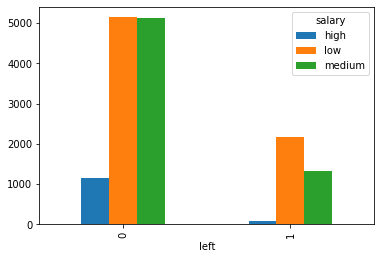

In [5]:
# EDA 
pd.crosstab(df.left, df.salary).plot.bar()

<AxesSubplot:xlabel='number_project'>

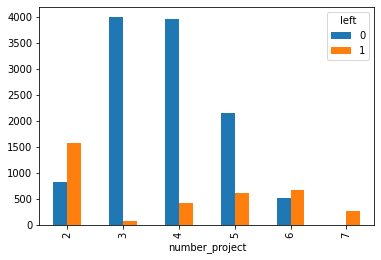

In [6]:
pd.crosstab(df.number_project,df.left).plot.bar()

<AxesSubplot:xlabel='promotion_last_5years'>

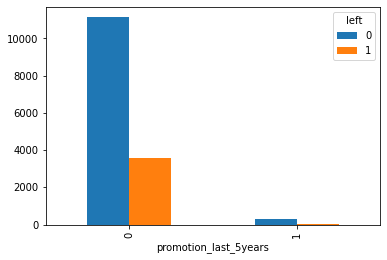

In [7]:
pd.crosstab(df.promotion_last_5years,df.left).plot.bar()

<AxesSubplot:xlabel='left'>

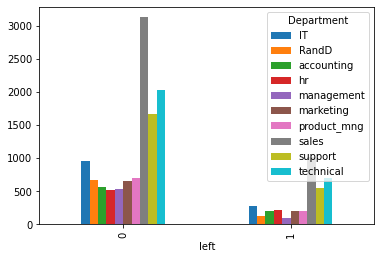

In [8]:
pd.crosstab(df.left,df.Department).plot.bar()

In [9]:
df.Department.value_counts()

sales          4140
technical      2720
support        2229
IT             1227
product_mng     902
marketing       858
RandD           787
accounting      767
hr              739
management      630
Name: Department, dtype: int64

In [10]:
# Encoding the catagorical data
df.Department = df.Department.replace(['sales', 'technical', 'support', 'IT', 'product_mng', 'marketing', 'RandD', 'accounting', 'hr', 'management'],
                                      [1,2,3,4,5,6,7,8,9,10])

In [11]:
df.salary.value_counts()

low       7316
medium    6446
high      1237
Name: salary, dtype: int64

In [12]:
df.salary = df.salary.replace(['low', 'medium', 'high'],[1,2,3])

In [13]:
df.dtypes

satisfaction_level       float64
last_evaluation          float64
number_project             int64
average_montly_hours       int64
time_spend_company         int64
Work_accident              int64
left                       int64
promotion_last_5years      int64
Department                 int64
salary                     int64
dtype: object

In [14]:
# dependent and independent feature
X = df.drop(['left'],axis=1)
y = df['left']

In [18]:
#### splitting the dataset to train and test dataset
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0)

In [107]:
from sklearn.linear_model import LogisticRegression
classify = LogisticRegression(penalty='l2',C=0.7,max_iter=200, solver='liblinear')
classify.fit(X_train, y_train)

LogisticRegression(C=0.7, max_iter=200, solver='liblinear')

In [108]:
y_pred = classify.predict(X_test)

In [109]:
from sklearn.metrics import accuracy_score, confusion_matrix
accuracy_score(y_pred, y_test)
confusion_matrix(y_pred, y_test)

array([[2661,  579],
       [ 220,  290]], dtype=int64)

In [175]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(min_samples_leaf=5, min_samples_split=5)
rfc.fit(X_train, y_train)
pred = rfc.predict(X_test)

In [176]:
accuracy_score(pred, y_test)

0.9786666666666667

In [177]:
confusion_matrix(pred, y_test)

array([[2873,   72],
       [   8,  797]], dtype=int64)